## Part 1 ‐ Exploratory data analysis 
The attached _logins.json_ file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
# remove warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in the data
df_logins = pd.read_json('logins.json')
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_logins.shape

(93142, 1)

In [4]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


    The logins dataframe is 1 column with 93,142 entries all in datetime format.
    No null values - Good!

#### Step 1: Aggregate these login counts based on 15 minute time intervals.

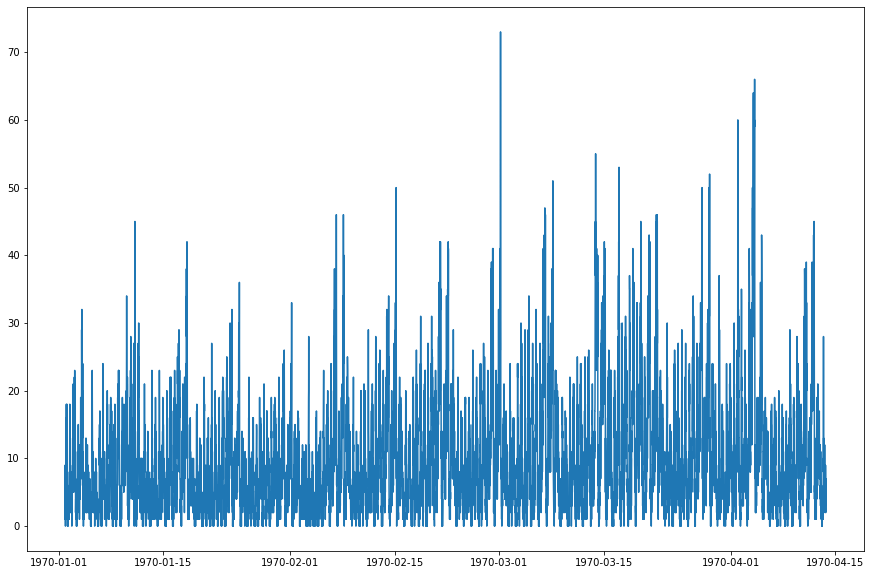

In [5]:
df_logins.resample('15T', on='login_time').count()
#Resample on 15 minute time interval and plot
plt.figure(figsize=(15,10))
plt.plot(df_logins.resample('15T', on='login_time').count())
plt.show()

There appears spike on March.

In [6]:
df_logins.set_index('login_time', inplace=True)
df_logins['count'] = 1

In [7]:
df_agg = df_logins.resample('15T', label='right').sum()
df_agg

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1
...,...
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2


#### Step 2: Vaisualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [8]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


The data begins January 1 and goes through April 13 of the year 1970. There are 9788 entries in one column called counts, means There are null values in count column.

In [9]:
# Filling missing value with 0
df_logins = df_logins.fillna(0)

In [10]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


No null value in count column, all Good!

In [11]:
monthly = df_logins.resample('1M', label='left').sum()
monthly

,count
login_time,
1969-12-31,21239
1970-01-31,24673
1970-02-28,33723
1970-03-31,13507


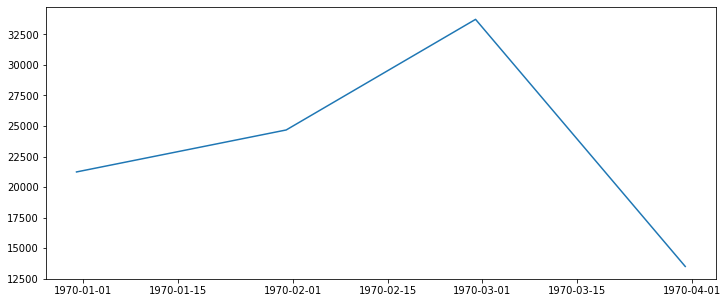

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(monthly)

I can see four months in the data: Jan, Feb, Mar, and Apr. February has the highest count and March the lowest.

As start of the year , January it rises slowly between 20000 and 25000. Then quickly increases  all days of February and peeks to 32500 at the end of the beginning of March. Then has a sharp decline throughout the whole month of March.

In [13]:
weekly = df_logins.resample('W').sum()
weekly

,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744
1970-02-08,5572
1970-02-15,5915
1970-02-22,7035
1970-03-01,6554


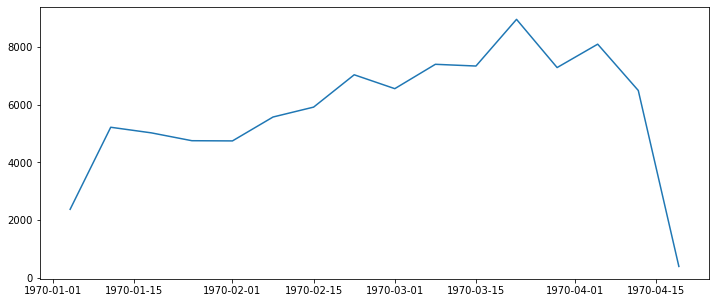

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(weekly)

Above plot tells during a week in mid_March there is 8000 counts. we could some April data better as well.As a result, we can now see that in the 2nd week of April is the second highest peak in the timespan.

In [15]:
#compute daily to get weekday
daily = df_logins.resample('1D').sum()

In [16]:
week_day = daily.reset_index().copy()
week_day['day'] = week_day['login_time'].dt.dayofweek
week_day

,login_time,count,day
0,1970-01-01,112,3
1,1970-01-02,681,4
2,1970-01-03,793,5
3,1970-01-04,788,6
4,1970-01-05,459,0
...,...,...,...
98,1970-04-09,818,3
99,1970-04-10,1009,4
100,1970-04-11,1352,5
101,1970-04-12,1409,6


<AxesSubplot:xlabel='day', ylabel='count'>

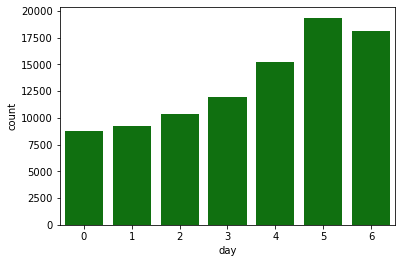

In [17]:
import seaborn as sns
week = week_day.groupby('day').sum()
sns.barplot(x = week.index, y=week['count'], color='g')

There are 103 days within this timespan. We know Monday = 0 and Sunday = 6. Additionally, we can see from the barplot that logins peak from Friday to Sunday which is the weekend.

In [18]:
hourly = df_logins.resample('H').sum().reset_index()
hourly

,login_time,count
0,1970-01-01 20:00:00,24
1,1970-01-01 21:00:00,9
2,1970-01-01 22:00:00,21
3,1970-01-01 23:00:00,58
4,1970-01-02 00:00:00,53
...,...,...
2442,1970-04-13 14:00:00,32
2443,1970-04-13 15:00:00,19
2444,1970-04-13 16:00:00,22
2445,1970-04-13 17:00:00,22


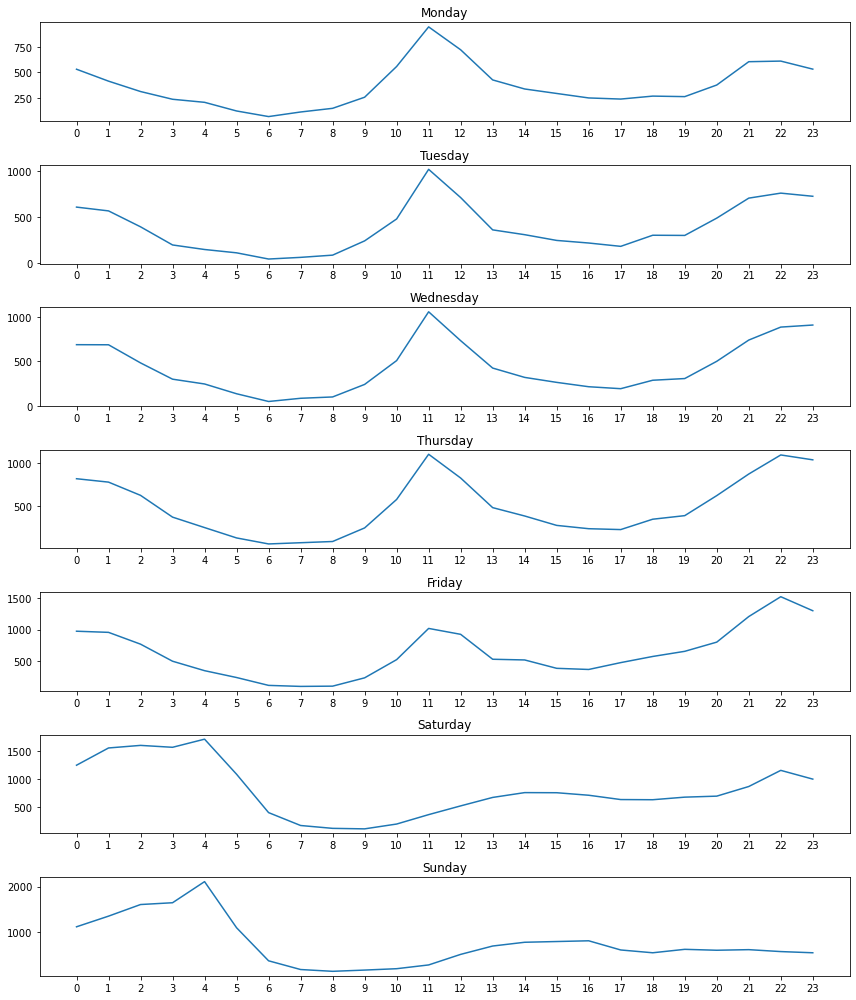

In [19]:
hourly['hour'] = hourly['login_time'].dt.hour
hourly['day'] = hourly['login_time'].dt.dayofweek
hourly_by_day = hourly.groupby(['day', 'hour']).sum().reset_index()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(nrows=7, figsize=(12, 14))

for i in range(7):
    ax[i].plot(hourly_by_day.loc[hourly_by_day['day'] == i, ['hour', 'count']].set_index('hour'))
    ax[i].set_title(weekdays[i])
    ax[i].set_xticks(np.arange(24))
    
plt.tight_layout()

### Conclusions

* Demand is greatest in the month of March and specifically during the week at between 11am and 12pm during the day and then between 10pm to midnight in the evening.
* Monday through Friday I see their lowest activity around 7am. 
* Saturday and Sunday trend of demand with peak activity at 4am and then again after 11pm. 
* Monday overall has the lowest activity and highest being Saturday.

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

    1.What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    2.Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the observation
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.


1.What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? 

I will choose the toll costs driver parterns in two cities reimbursed and the percentage of the reimbursed costs by total toll costs incharged as the key measure of success of this experiment. If the toll costs of driver parterns reimbursed increase, it indicates that more driver parterns went to another city. If the percentage of the reimbursed costs by total toll costs incharged increase, it shows that more activities between two cities are taken by driver parterns. The bigger the costs reimbursed and percentage are, the more success this experiment is.

2.Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the observation

c)how you would interpret the results and provide recommendations to the city operations team along with any caveats.

I will implement the experiment by collecting the data of the toll costs reimbursed, include date, time, cost, direction, driver parterns from which city, toll costs incharged. Then we will aggregate and anlalyze the data to find out the trend. If the costs reimbursed and percentage are increasing,
I will visulize the experiment result of the trend, weekday, time of a day, direction, percentagae, ect. Then prepare a presentation to provide recommendations to the city operations team. 

## Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge. 

    1.Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
    2.Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
    3.Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

## Data description

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: the average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [20]:
# Read in the data
import json

file = open('ultimate_data_challenge.json', 'r')
df_challenge = pd.DataFrame(json.load(file))
file.close()

df_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
df_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are missing values in columns 'avg_rating_by_driver', 'avg_rating_of_driver', and 'phone'.

In [22]:
# Fill in missing values
df_challenge['avg_rating_by_driver'].fillna(df_challenge['avg_rating_by_driver'].mean(), inplace=True)
df_challenge['avg_rating_of_driver'].fillna(df_challenge['avg_rating_of_driver'].mean(), inplace=True)
df_challenge.dropna(axis=0, inplace=True)

In [23]:
df_challenge = df_challenge.reset_index(drop=True)
df_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
# Convert dates to datetime format
df_challenge['last_trip_date'] = pd.to_datetime(df_challenge['last_trip_date'])
df_challenge['signup_date'] = pd.to_datetime(df_challenge['signup_date'])
df_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

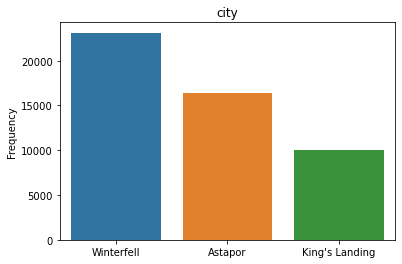

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


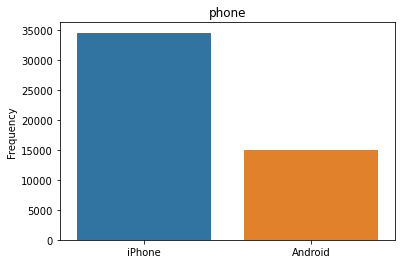

iPhone     34582
Android    15022
Name: phone, dtype: int64


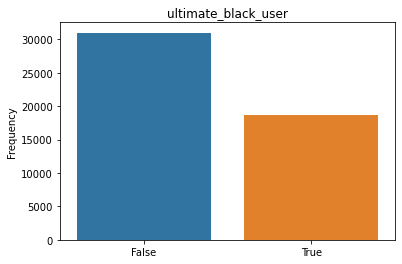

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [25]:
# Create box plots of all categorical, non-date data
categorical_features = ['city', 'phone', 'ultimate_black_user']
for feature in categorical_features:
    sns.barplot(x = list(df_challenge[feature].value_counts().index), y = df_challenge[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df_challenge[feature].value_counts())

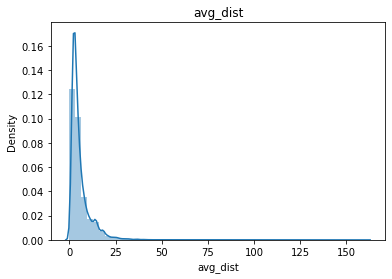

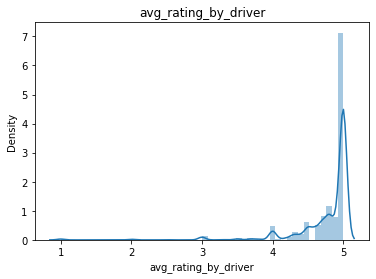

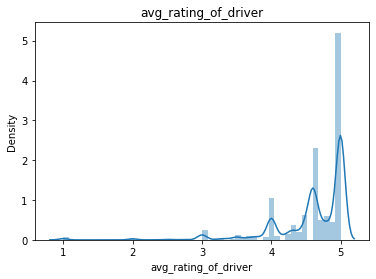

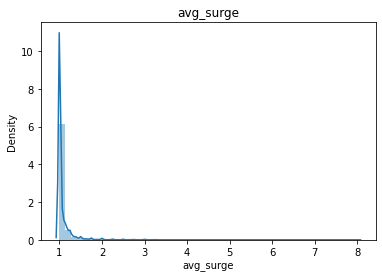

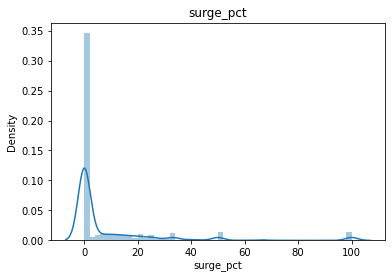

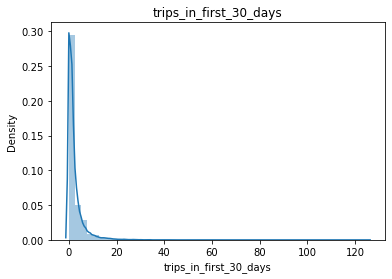

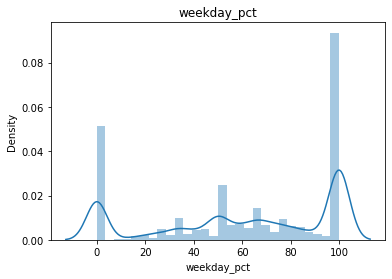

In [26]:
# distributions of numerical features
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
for feature in numerical_features:
    sns.distplot(df_challenge[feature])
    plt.title(feature)
    plt.show();

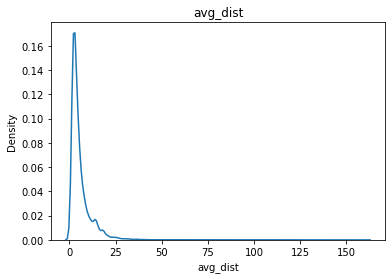

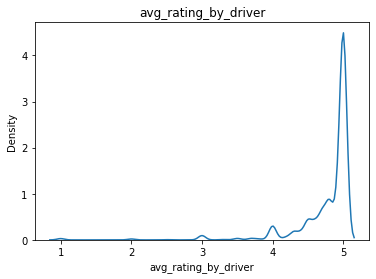

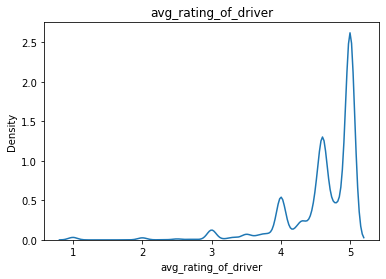

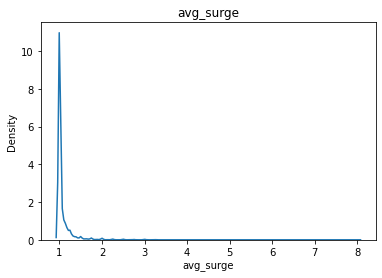

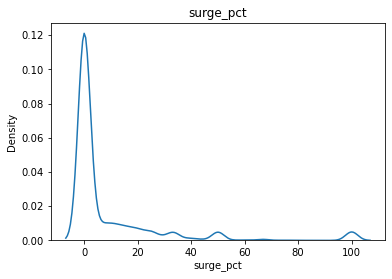

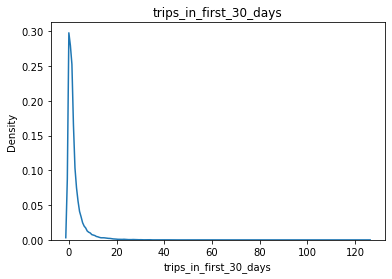

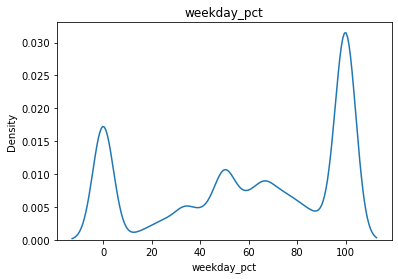

In [27]:
for feature in numerical_features:
    sns.kdeplot(df_challenge[feature])
    plt.title(feature)
    plt.show();

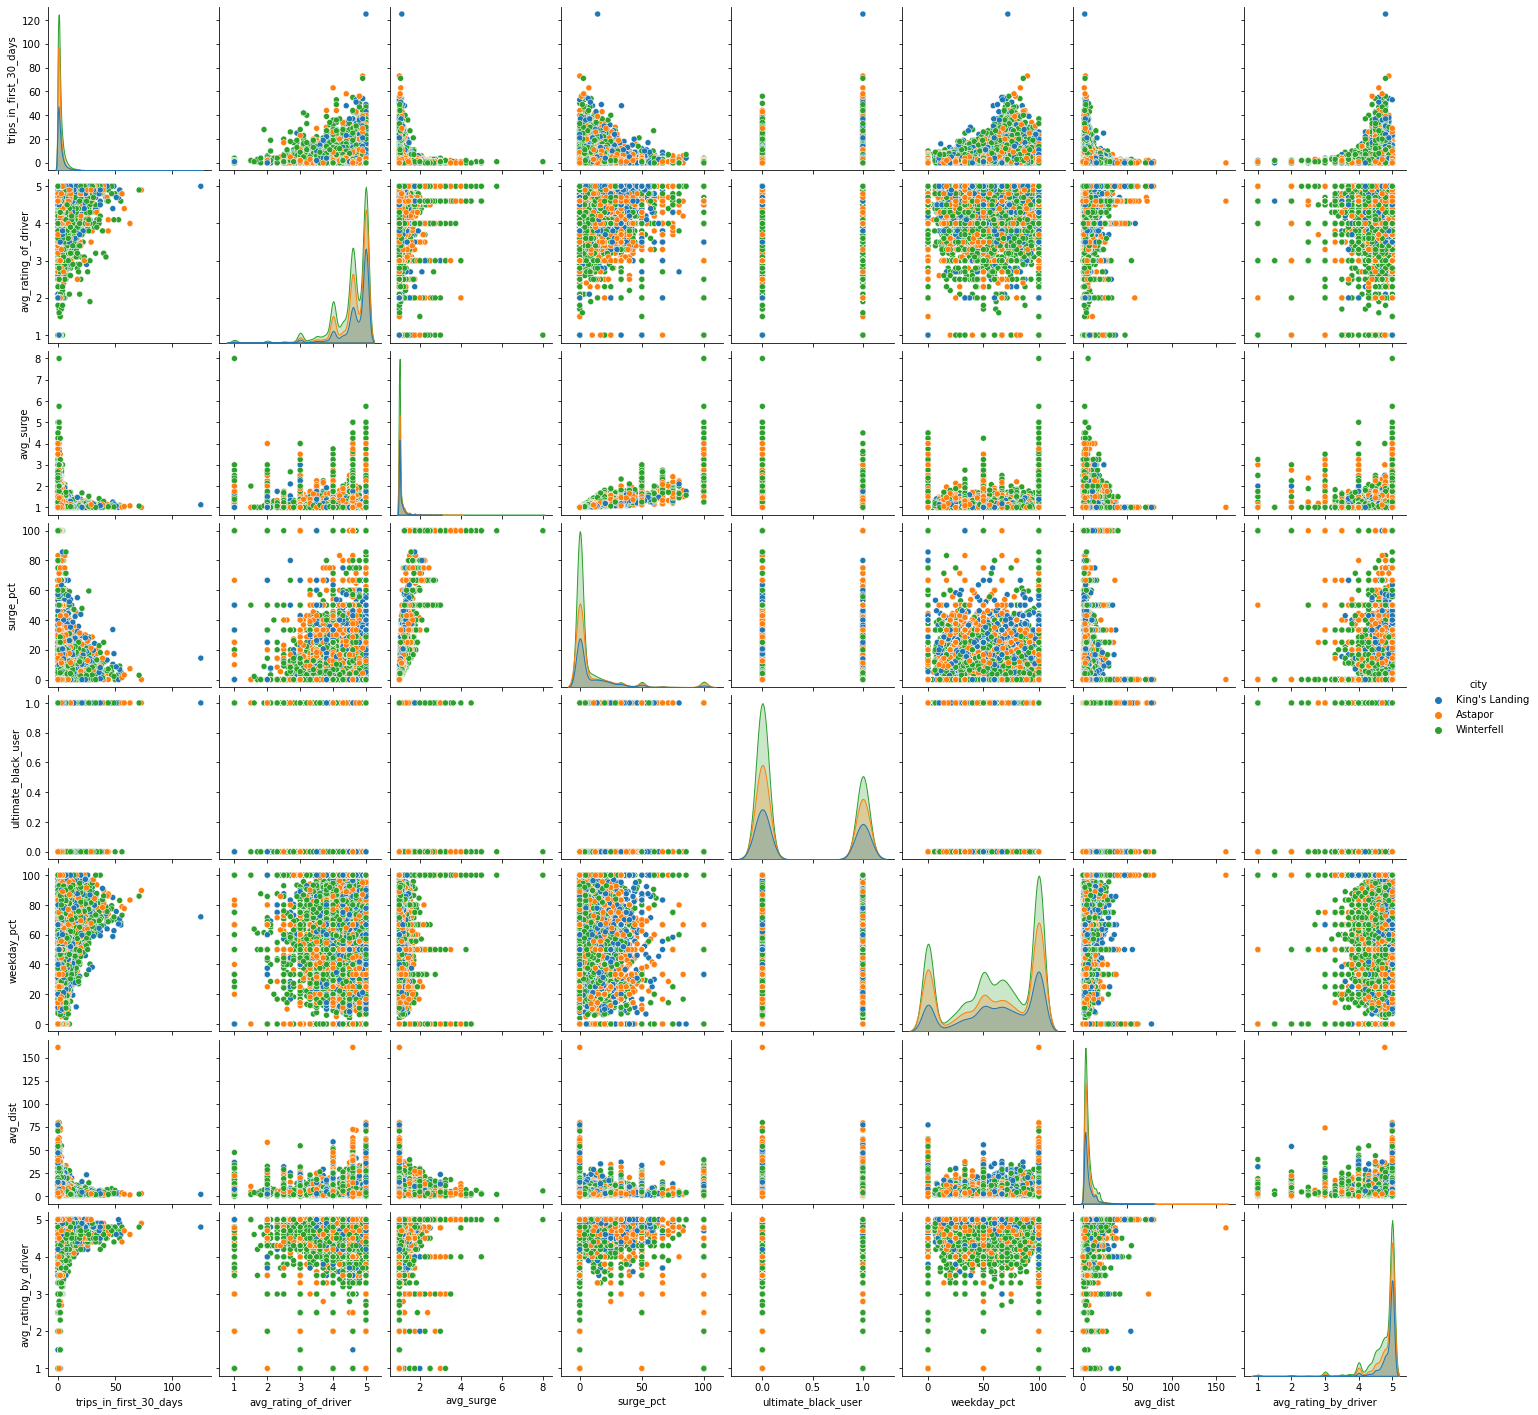

In [28]:
sns.pairplot(df_challenge, hue='city')

#### What fraction of the observed users were retained?

In [29]:
df_challenge.sort_values(by='last_trip_date').tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
45166,King's Landing,2,2014-01-25,4.4,1.14,2014-07-01,Android,17.9,False,83.9,2.32,4.8
12053,King's Landing,16,2014-01-18,4.9,1.02,2014-07-01,Android,3.9,False,74.0,2.64,4.8
18667,Astapor,3,2014-01-10,4.7,1.02,2014-07-01,iPhone,3.2,False,67.7,6.22,4.8
11999,Winterfell,1,2014-01-24,4.7,1.04,2014-07-01,iPhone,15.4,True,38.5,6.80,4.9
31351,Winterfell,12,2014-01-19,4.9,1.07,2014-07-01,iPhone,6.0,True,70.0,5.63,4.7


In [30]:
df_challenge['last_trip_date'].sort_values().tail()

45166   2014-07-01
12053   2014-07-01
18667   2014-07-01
11999   2014-07-01
31351   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

So the latest 'last_trip_date' is 2014-07-01. As we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days, We consider a user retained if his 'last_trip_date' is after 2014-06-01.


In [31]:
frac = len(df_challenge[df_challenge['last_trip_date'] > '2014-06-01'])/len(df_challenge)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.65% of the observed users were retained.


In [32]:
# Create the target variable -- retained
df_challenge['retained'] = (df_challenge['last_trip_date'] > '2014-06-01')*1
df_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [33]:
df_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  retained                49604 non-null  int32 

In [34]:
df_challenge.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [35]:
# Creating dummy variables for categorical features
ndf = pd.get_dummies(df_challenge, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)
ndf.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,0,0


ndf is the final dataset we will use for modeling in next step.

In [36]:
X = ndf.drop('retained', axis=1)
y = ndf['retained']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


Random forests algorithm is among the most popular machine learning methods thanks to its relatively good accuracy, robustness and ease of use. It is also often used for feature selection.

Below are the advantages of random forest algorithm compared with other classification algorithms.

    The overfitting problem will never come when we use the random forest algorithm in any classification problem.
    The random forest algorithm can be used for feature engineering.
        Which means identifying the most important features out of the available features from the training dataset.


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [39]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.76716644 0.75733904 0.76893033 0.7672631  0.76360887]
Average 5-Fold CV Score: 0.7648615565572838


using Random Forest Claasifier with default parameters, we can get a model with 76.48% accuracy.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# Define function to get metrics of the model
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [42]:
# Create the hyperparameter grid
n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [43]:
# Instantiate the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=5)

In [44]:
%%time
# build model    
clf_cv.fit(X_train, y_train)
# predict using model
y_predict = clf_cv.predict(X_test) 

Wall time: 18min 40s


In [45]:
# Print the optimal parameters and best score
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))
print()
# evaluate model prediction performance 
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': 10, 'n_estimators': 100, 'oob_score': True}
Tuned Score: 0.7681879090935878

Test set performance:
Accuracy:  0.7607096058865034
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.68      0.65      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



After hyperparameter tuning, we get the best parameters of n_estimators=100, max_features=10, with accuracy of 76.82%. 

#### Final Model

In [47]:
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.68      0.65      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921

Test set accuracy: 75.94%


In [50]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,5163,1127
1,1260,2371


Text(0.5, 1.0, 'ROC Curve')

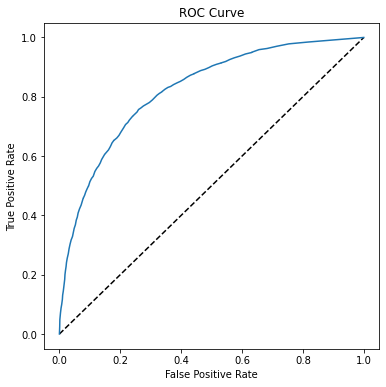

In [51]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [52]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8218


The metrics of final model are:

    Test set accuracy: 75.94%
    AUC: 0.8232

#### Feature Selection

In [54]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
5,avg_dist,0.297409
6,avg_rating_by_driver,0.151548
4,weekday_pct,0.114528
3,surge_pct,0.082249
1,avg_rating_of_driver,0.081046


From the importance of features,the most important 3 features are:

    avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    avg_rating_by_driver: the rider’s average rating over all of their trips
    weekday_pct: the percent of the user’s trips occurring during a weekday



### Suggestions

To improve long-term rider retention, Ultimate need improve in the following aspects:

    1.Attract riders to take longer trips during the first 30 days after signup.
    2.Provide better service to get higher ratings from the riders.
    3.Persuade riders to take trips during weekdays.

